# Pancreas

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir='/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

time: 6.6 s (started: 2022-06-06 23:51:27 -05:00)


## Set Parameters

In [140]:
n_neighbors=200
downsample_step=(100,100)

time: 1.64 ms (started: 2022-05-17 16:13:22 -05:00)


## Load detail

In [2]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/pancreas/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
cellDancer_df=pd.read_csv(detail_file)

time: 14.9 s (started: 2022-06-06 23:52:25 -05:00)


In [9]:
cellDancer_df.rename(columns={'u0':'unsplice','s0':'splice','u1':'unsplice_predict','s1':'splice_predict'}, inplace=True)

time: 1.92 ms (started: 2022-06-06 23:59:22 -05:00)


In [10]:
cellDancer_df

,cellIndex,gene_name,splice,unsplice,splice_predict,unsplice_predict,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


time: 19.3 ms (started: 2022-06-06 23:59:24 -05:00)


## Visualize gene velocity

In [3]:
xlim = (-15, 15)
ylim = (-10, 10)

time: 920 µs (started: 2022-06-06 23:52:42 -05:00)


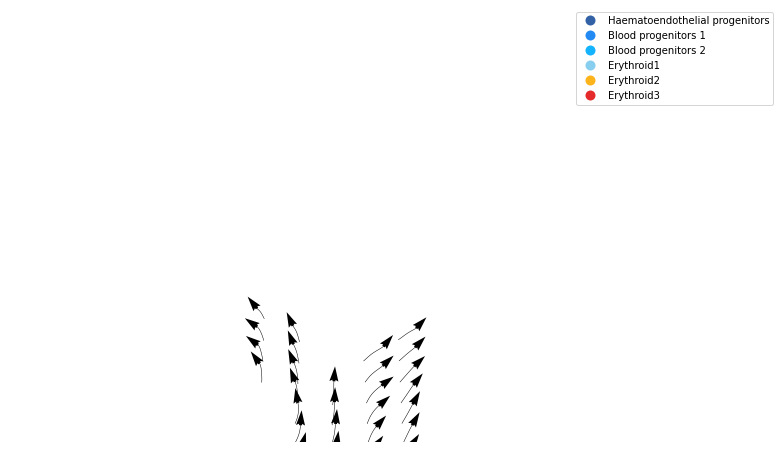

time: 1min 11s (started: 2022-06-06 23:59:31 -05:00)


In [11]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='gene'
expression_scale='power10'
projection_neighbor_size=200
speed_up=(100,100)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=15
arrow_grid=(20,20)

fig, ax = plt.subplots(figsize=(10,8))
im = cdplt.cell.scatter_cell(
    ax,cellDancer_df, 
    colors=colormap.colormap_pancreas, 
    alpha=0.6, 
    s=10,
    velocity=True, 
    legend='on',
    min_mass=min_mass,
    arrow_grid=arrow_grid, 
    custom_xlim=xlim, 
    custom_ylim=ylim)
ax.axis('off')
plt.show()

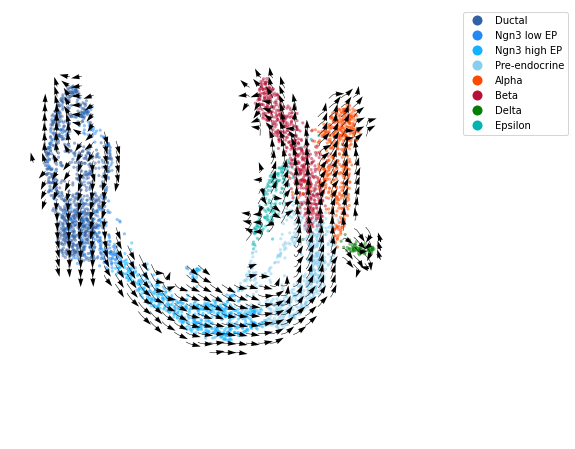

time: 4.91 s (started: 2022-06-07 00:01:42 -05:00)


In [13]:
%autoreload 2

fig, ax = plt.subplots(figsize=(8,8))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_pancreas, alpha=0.5, s=10,
             gene=None, velocity=True, custom_xlim=xlim, custom_ylim=ylim, legend='on')
ax.axis('off')
plt.show()

In [16]:
%%script echo skipping for now
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

skipping for now
time: 38.8 ms (started: 2022-05-05 17:16:51 -05:00)


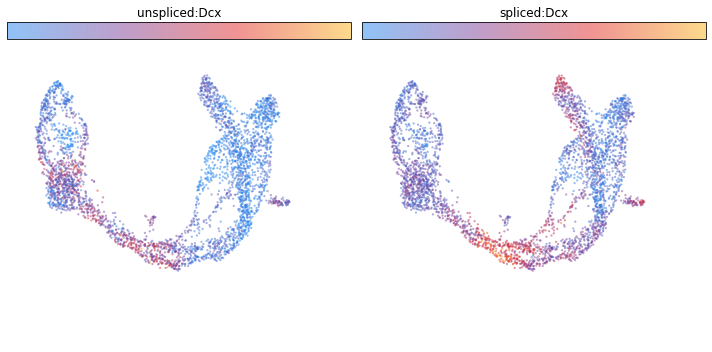

time: 1.56 s (started: 2022-05-09 11:00:48 -05:00)


In [9]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

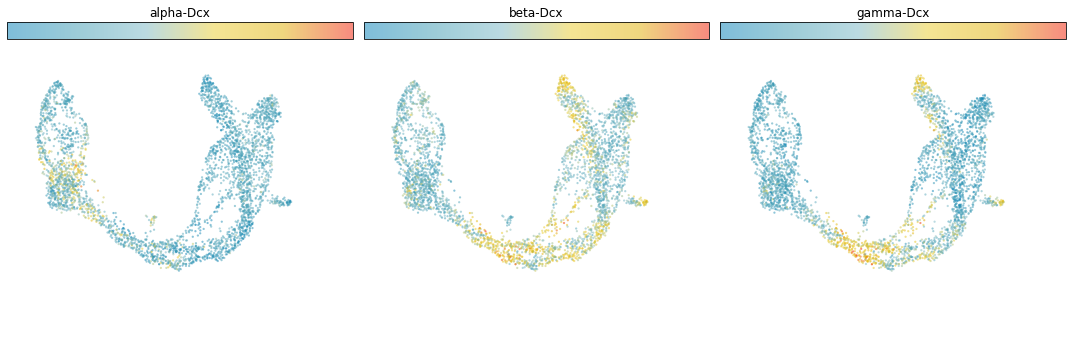

time: 2.2 s (started: 2022-05-09 11:00:54 -05:00)


In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

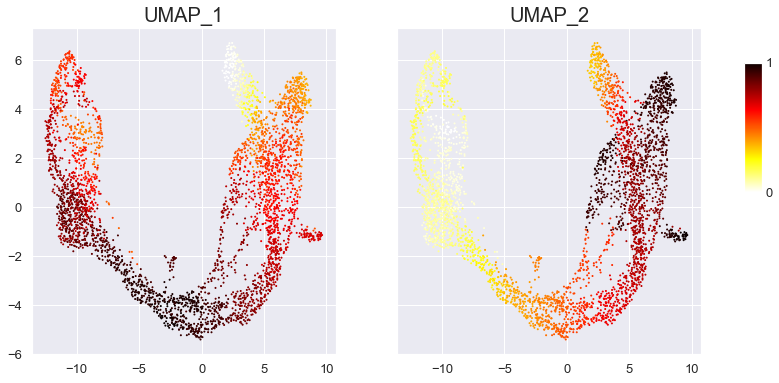

time: 284 ms (started: 2022-05-16 12:51:52 -05:00)


In [65]:

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

im1=axes[0].scatter(x=embedding[:,0], y=embedding[:,1], 
                    c=normalized_abr_umap[:,0], cmap='hot_r', alpha=1, vmin=0, vmax=1, s=1)

im2=axes[1].scatter(x=embedding[:,0], y=embedding[:,1], 
                    c=normalized_abr_umap[:,1], cmap='hot_r', alpha=1, vmin=0, vmax=1, s=1)

axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)
axes[1].tick_params(axis='x', labelsize=13)
axes[1].tick_params(axis='y', labelsize=13)


cax = plt.axes([0.95, 0.5, 0.02, 0.3])
cbar = fig.colorbar(im2, cax=cax, ticks=[0,1])

axes[0].set_title("UMAP_1", fontdict = {'size':20})
axes[1].set_title("UMAP_2", fontdict = {'size':20})

cax.tick_params(axis='y', labelsize=13, size=0)
cax.set_yticklabels(['0', '1'])

#plt.savefig("umap_on_embedding.pdf")
plt.show()

In [54]:
%autoreload 2
from celldancer.diffusion import embedding_normalization, velocity_normalization, generate_grid, compute_path_divider_matrix

gene_choice = load_cellDancer[~load_cellDancer['velocity1'].isna()]['gene_name']
gene_choice = gene_choice.drop_duplicates()
one_gene = gene_choice.to_list()[0]
embedding = load_cellDancer[load_cellDancer['gene_name'] ==
        one_gene][['embedding1', 'embedding2']]
embedding = embedding.to_numpy()

# This could be problematic if it's not in the gene_choice
velocity_embedding = load_cellDancer[load_cellDancer.gene_name ==
        one_gene][['velocity1', 'velocity2']].dropna()
sampling_ixs = velocity_embedding.index

cell_embedding, normalized_embedding = embedding_normalization(
    embedding[sampling_ixs], embedding, mode='minmax', NORM_ALL_CELLS=True)
velocity = velocity_normalization(velocity_embedding, mode='max')

abr_umap = load_cellDancer[load_cellDancer['gene_name'] ==
                one_gene][['alpha_beta_gamma_umap1', 'alpha_beta_gamma_umap2']]
_, normalized_abr_umap = embedding_normalization(
                abr_umap.loc[sampling_ixs], abr_umap, mode='minmax', NORM_ALL_CELLS=True)


__ = generate_grid(cell_embedding, normalized_embedding,
        velocity, normalized_abr_umap, steps=grid)

vel_mesh = __[0]
grid_mass = __[1]
grid_umap = __[2]
cell_grid_idx = __[3]
cell_grid_coor = __[4]
all_grid_idx = __[5]
all_grid_coor = __[6]


fmat = grid_umap
ngrids = fmat.shape[:-1]
flat_length = np.multiply(*ngrids)
temp = fmat.reshape(flat_length, fmat.shape[-1])

temp2 = temp-temp[:,None]
temp2 = np.linalg.norm(temp2, axis=-1)


#path_divider_matrix = compute_path_divider_matrix(grid_umap, cutoff=0.1)

time: 1.24 s (started: 2022-05-16 12:24:56 -05:00)


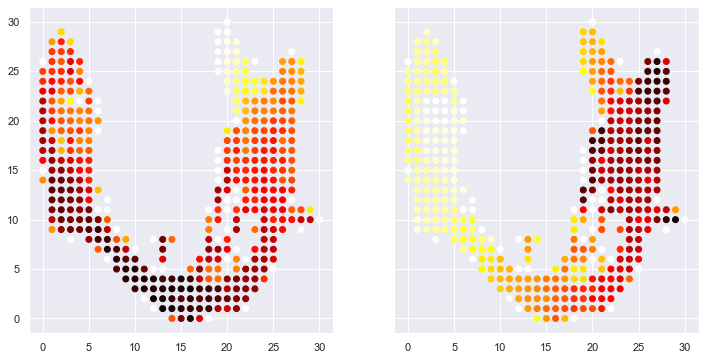

time: 235 ms (started: 2022-05-16 12:35:02 -05:00)


In [60]:
import matplotlib.pylab as plt

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)


x=list()
y=list()
vx=list()
vy=list()
for i in range(grid_umap.shape[0]):
    for j in range(grid_umap.shape[1]):
        x.append(i)
        y.append(j)
        vx.append(grid_umap[i,j][0])
        vy.append(grid_umap[i,j][1])
axes[0].scatter(x,y, c=vx, cmap='hot_r')
axes[1].scatter(x,y, c=vy, cmap='hot_r')

plt.show()

## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 15270/15270 [00:11<00:00, 1289.29it/s]


use path_similarity:  0.175
There are 5 clusters.
[0 1 2 3 4]


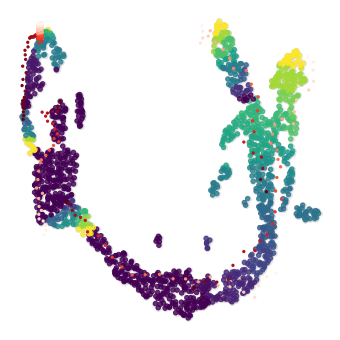




Cluster  0
Total cells in the cluster:  921
MAX allowed zero time cells:  46
MAX allowed terminal cells:  46
Only  23  terminal cells left.
[38, 44, 70, 96, 115, 313, 382, 411, 613, 640, 763, 808, 852, 856, 1005, 1123, 1158, 1183, 1269, 1327, 1344, 1417, 1507]
269  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  269
MAX allowed zero time cells:  46
MAX allowed terminal cells:  46
Only  10  zero cells left. 
[242, 347, 379, 386, 567, 800, 878, 917, 932, 1465]
Only  11  terminal cells left.
[60, 163, 222, 228, 288, 289, 360, 618, 873, 986, 1110]
number of paths:  2
number of subclusters:  2

Display reference paths for cluster 0


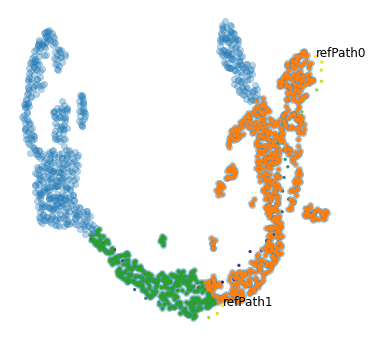


intercluster cell time adjustment
number of cells:  921
Cutoff is  0.050813017779825206
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (1511, 222)
pair_cellIDs:  (413, 360)
pair_cellIDs:  (686, 618)
pair_cellIDs:  (1, 873)
pair_cellIDs:  (1100, 60)
pair_cellIDs:  (1196, 288)
pair_cellIDs:  (227, 163)
pair_cellIDs:  (709, 228)
pair_cellIDs:  (123, 986)
pair_cellIDs:  (1218, 837)
pair_cellIDs:  (820, 1110)
pair_cellIDs:  (1029, 835)
pair_cellIDs:  (385, 289)
pair_cellIDs:  (54, 675)
pair_cellIDs:  (1171, 555)
pair_cellIDs:  (545, 812)
pair_cellIDs:  (1186, 1229)

Peak mode:  most_frequent_shift


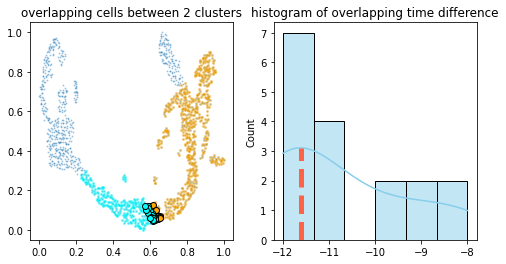

Time shift is:  -12
The overlapping cells are: 
cell  1511  from cluster  0  and  222  from cluster  1


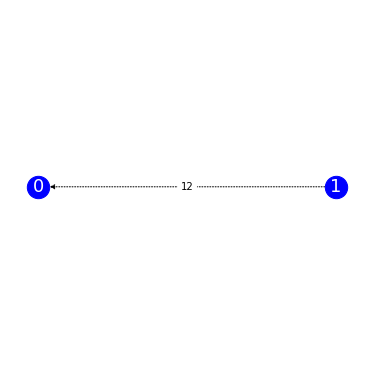

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: -12}



Cluster  1
Total cells in the cluster:  334
MAX allowed zero time cells:  16
MAX allowed terminal cells:  16
Only  8  terminal cells left.
[45, 212, 486, 1078, 1082, 1115, 1350, 1451]
270  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  270
MAX allowed zero time cells:  16
MAX allowed terminal cells:  16
Only  11  zero cells left. 
[358, 605, 620, 717, 806, 959, 979, 1044, 1048, 1102, 1498]
Only  5  terminal cells left.
[64, 270, 356, 889, 1289]
number of paths:  2
number of subclusters:  2

Display reference paths for cluster 1


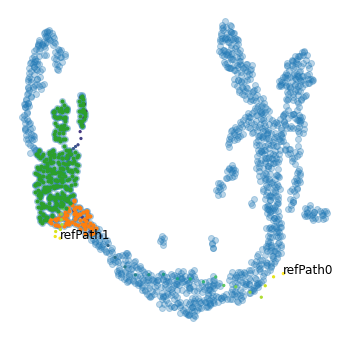


intercluster cell time adjustment
number of cells:  334
Cutoff is  0.028425674845320367
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (615, 574)
pair_cellIDs:  (1174, 1013)
pair_cellIDs:  (58, 373)
pair_cellIDs:  (247, 239)
pair_cellIDs:  (943, 1071)
pair_cellIDs:  (476, 1402)
pair_cellIDs:  (693, 1249)
pair_cellIDs:  (1088, 1156)
pair_cellIDs:  (1302, 1329)
pair_cellIDs:  (282, 53)

Peak mode:  most_frequent_shift


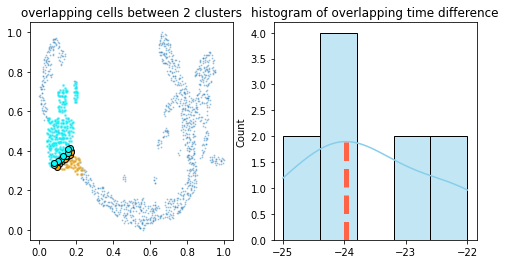

Time shift is:  -24
The overlapping cells are: 
cell  615  from cluster  0  and  574  from cluster  1


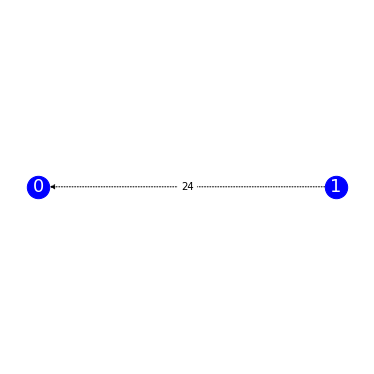

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: -24}



Cluster  2
Total cells in the cluster:  127
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
11  terminal cells left.
Sample trajs for terminal cells in cluster  2  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  2
Total cells in the cluster:  11
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  3  zero cells left. 
[310, 365, 1141]
Only  4  terminal cells left.
[315, 1007, 1037, 1332]
number of paths:  2
number of subclusters:  2

Display reference paths for cluster 2


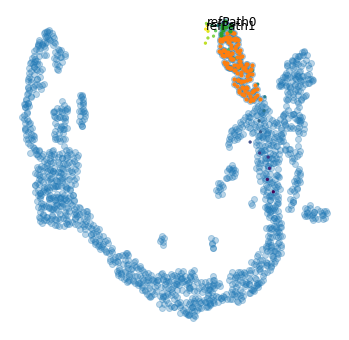


intercluster cell time adjustment
number of cells:  127
Cutoff is  0.018829597100897755
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (151, 310)
pair_cellIDs:  (759, 315)
pair_cellIDs:  (864, 1007)

Peak mode:  least_shift


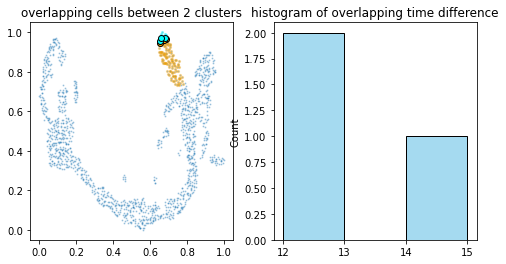

Time shift is:  12
The overlapping cells are: 
cell  759  from cluster  0  and  315  from cluster  1


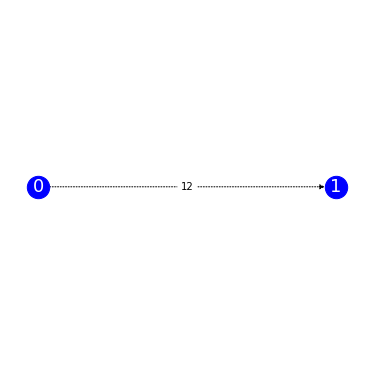

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: 12}



Cluster  3
Total cells in the cluster:  35
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  3  zero cells left. 
[290, 503, 601]
Only  7  terminal cells left.
[3, 143, 571, 916, 944, 1106, 1130]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 3


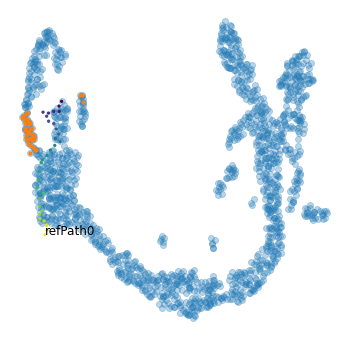




Cluster  4
Total cells in the cluster:  110
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[467]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 4


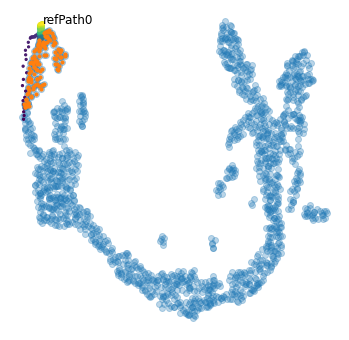




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  1527
Cutoff is  0.061562168620001946
Number of nodes:  5
clusterIDs:  [0, 1, 2, 3, 4]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (917, 1115)
pair_cellIDs:  (878, 486)
pair_cellIDs:  (800, 212)
pair_cellIDs:  (379, 1451)
pair_cellIDs:  (932, 1078)
pair_cellIDs:  (567, 1082)
pair_cellIDs:  (347, 45)
pair_cellIDs:  (351, 1107)
pair_cellIDs:  (386, 50)

Peak mode:  most_frequent_shift


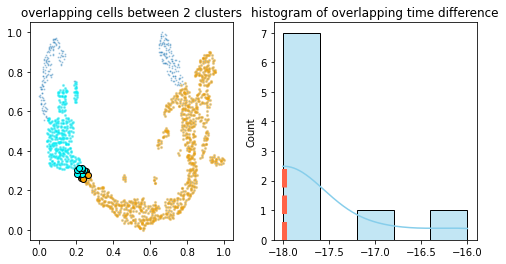

Time shift is:  -18
The overlapping cells are: 
cell  917  from cluster  0  and  1115  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (854, 1264)
pair_cellIDs:  (597, 1366)
pair_cellIDs:  (11, 1487)
pair_cellIDs:  (960, 155)
pair_cellIDs:  (976, 770)
pair_cellIDs:  (1133, 1138)
pair_cellIDs:  (1076, 938)
pair_cellIDs:  (106, 1416)
pair_cellIDs:  (1471, 332)

Peak mode:  most_frequent_shift


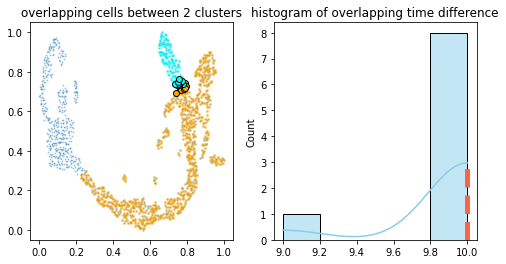

Time shift is:  10
The overlapping cells are: 
cell  854  from cluster  0  and  1264  from cluster  2

Consolidating time between clusters  0  and  3 ...
No close cells between clusters	 (0, 3)

Consolidating time between clusters  0  and  4 ...
No close cells between clusters	 (0, 4)

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)

Consolidating time between clusters  1  and  3 ...
pair_cellIDs:  (831, 601)
pair_cellIDs:  (1048, 290)
pair_cellIDs:  (1102, 503)
pair_cellIDs:  (498, 571)
pair_cellIDs:  (185, 143)
pair_cellIDs:  (952, 916)
pair_cellIDs:  (278, 944)
pair_cellIDs:  (345, 1130)
pair_cellIDs:  (576, 1106)

Peak mode:  most_frequent_shift


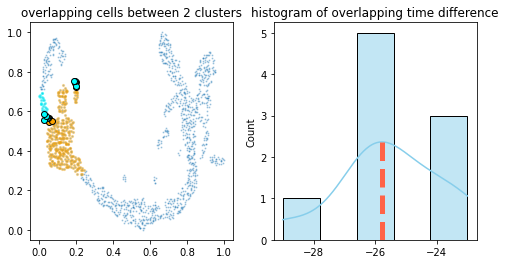

Time shift is:  -26
The overlapping cells are: 
cell  185  from cluster  1  and  143  from cluster  3

Consolidating time between clusters  1  and  4 ...
No close cells between clusters	 (1, 4)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)

Consolidating time between clusters  2  and  4 ...
No close cells between clusters	 (2, 4)

Consolidating time between clusters  3  and  4 ...
pair_cellIDs:  (851, 471)
pair_cellIDs:  (781, 1482)
pair_cellIDs:  (1253, 226)
pair_cellIDs:  (189, 377)
pair_cellIDs:  (530, 1328)
pair_cellIDs:  (1101, 51)
pair_cellIDs:  (37, 801)

Peak mode:  most_frequent_shift


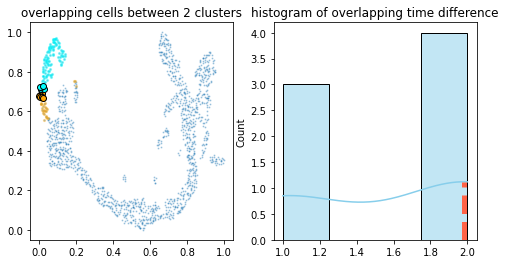

Time shift is:  0
The overlapping cells are: 
cell  851  from cluster  3  and  471  from cluster  4


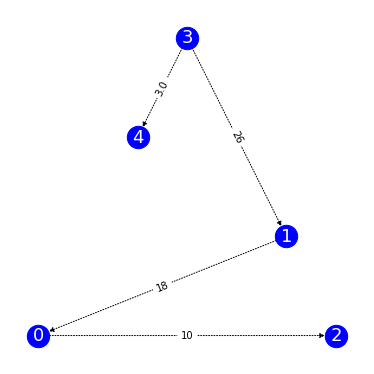

Connected components:  {0, 1, 2, 3, 4}
All nodes adjustment:  {0: 0, 1: -18, 2: 10, 3: -44, 4: -44}


All inter cluster cell time has been resolved.



There are 3696 cells.


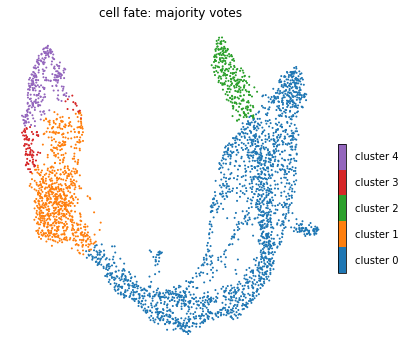

--- 97.16374230384827 seconds ---
time: 1min 37s (started: 2022-06-07 00:12:47 -05:00)


In [32]:
%autoreload 2

dt = 0.1
#t_total = {dt:int(10/dt)} 
t_total = {0.1: 200}
n_repeats = 10

grid = (15, 15)

load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 5,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=-2)

In [34]:
load_cellDancer = cellDancer_df
alpha_time  = load_cellDancer[load_cellDancer.clusters == 'Alpha'
                             ][load_cellDancer.gene_name == 'Dcx']['pseudotime']
beta_time = load_cellDancer[load_cellDancer.clusters == 'Beta'
                           ][load_cellDancer.gene_name == 'Dcx']['pseudotime']

alpha_time.max(), beta_time.max()

(1.0, 0.9778553785878545)

time: 2.56 s (started: 2022-06-07 00:22:53 -05:00)


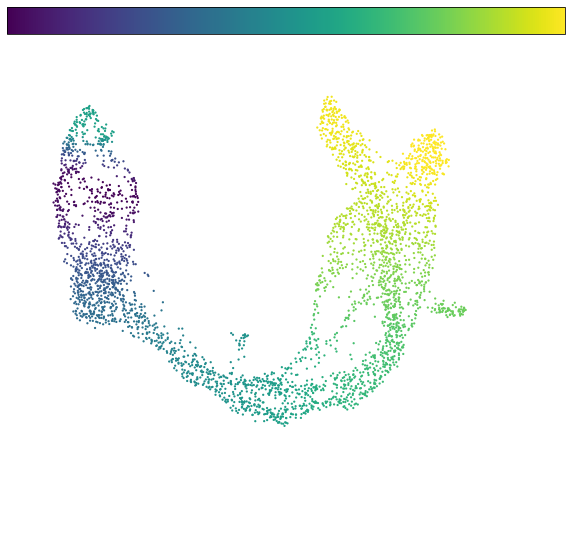

time: 701 ms (started: 2022-06-07 00:22:56 -05:00)


In [35]:
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', 
                           alpha=1,
                           gene=None, velocity=False,
                           custom_xlim=xlim, custom_ylim=ylim)
ax.axis('off')
plt.show()

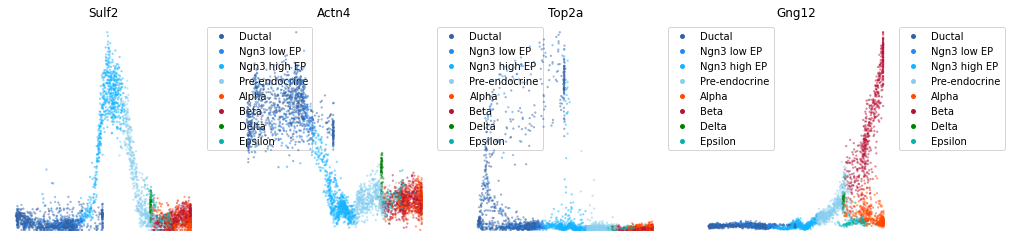

time: 4.26 s (started: 2022-06-07 00:10:10 -05:00)


In [29]:
gene_list=['Sulf2', 'Actn4', 'Top2a','Gng12']

ncols=5
fig = plt.figure(figsize=(20,4))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=load_cellDancer,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        legend='on',
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

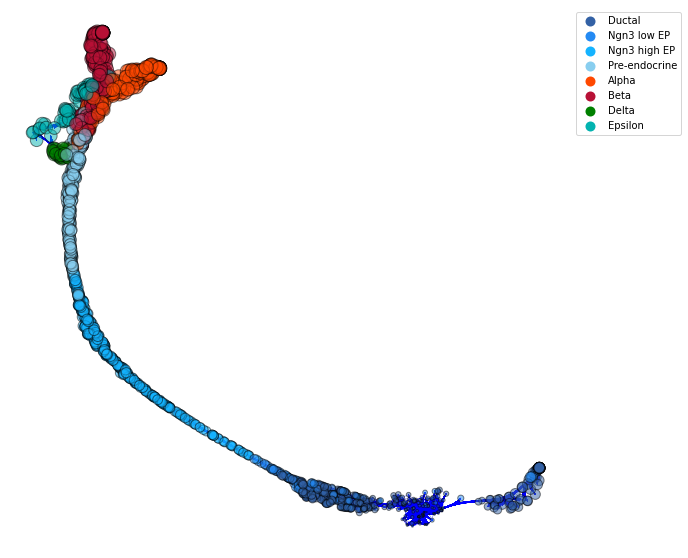

time: 8min 28s (started: 2022-06-07 00:14:24 -05:00)


In [33]:
%autoreload 2

from celldancer.plotting import graph
fig, ax = plt.subplots(figsize=(10,10))
graph.graph(ax, 
    load_cellDancer, 
    node_layout='forcedirected', 
    use_edge_bundling=True, 
    node_colors=colormap.colormap_pancreas, 
    edge_length=3, 
    node_sizes='pseudotime', 
    colorbar='on',
    legend='on')